# Stock data notebook 3 - continued

In [3]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

### Read the data once again

In [5]:
tech_stocks = ["AAPL", "GOOG", "MSFT", "AMZN"]
for ticker in tech_stocks:
    stock_df = pd.read_csv(f"./data/stock_data_2023/{ticker}.csv", parse_dates=["Date"])
    stock_df["Stock"] = ticker
    stock_df["Daily Return"] = stock_df["Adj Close"].pct_change() * 100
    stock_df.dropna(inplace=True)
    globals()[ticker] = stock_df
all_stocks = pd.concat([GOOG, MSFT, AMZN, AAPL])
all_stocks

,Date,Open,High,Low,Close,Adj Close,Volume,Stock,Daily Return
1,2023-01-04,91.010002,91.239998,87.800003,88.709999,88.609169,27046500,GOOG,-1.103673
2,2023-01-05,88.070000,88.209999,86.559998,86.769997,86.671371,23136100,GOOG,-2.186905
3,2023-01-06,87.360001,88.470001,85.570000,88.160004,88.059799,26612600,GOOG,1.601945
4,2023-01-09,89.195000,90.830002,88.580002,88.800003,88.699066,22996700,GOOG,0.725946
5,2023-01-10,86.720001,89.474998,86.699997,89.239998,89.138565,22855600,GOOG,0.495495
...,...,...,...,...,...,...,...,...,...
245,2023-12-22,195.179993,195.410004,192.970001,193.600006,193.091385,37122800,AAPL,-0.554741
246,2023-12-26,193.610001,193.889999,192.830002,193.050003,192.542831,28919300,AAPL,-0.284090
247,2023-12-27,192.490005,193.500000,191.089996,193.149994,192.642548,48087700,AAPL,0.051790
248,2023-12-28,194.139999,194.660004,193.169998,193.580002,193.071426,34049900,AAPL,0.222629


### Also recreate the DataFrame of just daily returns

In [7]:
returns_df = all_stocks[["Stock", "Daily Return"]].pivot(columns="Stock", values="Daily Return")
returns_df.head()

Stock,AAPL,AMZN,GOOG,MSFT
1,1.031420,-0.792357,-1.103673,-4.374316
2,-1.060460,-2.372558,-2.186905,-2.963781
3,3.679407,3.561115,1.601945,1.178533
4,0.408897,1.486988,0.725946,0.973635
5,0.445636,2.873171,0.495495,0.761709


### Lets start looking at simple risk analysis by plotting the mean vs std dev for each stock

In [9]:
tech_stocks = ["AAPL", "GOOG", "MSFT", "AMZN"]
# Create a new DataFrame with just the values we want
rows = []
for ticker in tech_stocks:
    rows.append([
        returns_df[ticker].mean(),
        returns_df[ticker].std(),
        ticker])
ra_df = DataFrame(rows, columns=["Mean", "Std Dev", "Stock"])
ra_df

,Mean,Std Dev,Stock
0,0.183493,1.257004,AAPL
1,0.200177,1.928327,GOOG
2,0.197166,1.582433,MSFT
3,0.251149,2.080485,AMZN


### And then plot it

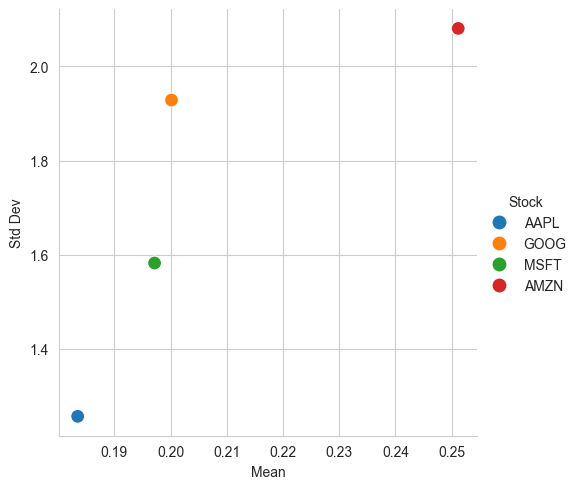

In [10]:
sns.relplot(data=ra_df, x="Mean", y="Std Dev", hue="Stock", s=100)

### Not much variation in the mean values, but quite a bit in the standard deviation.
### At least for this very simple set, on a _daily_ basis, it looks like Apple is the low-risk, low-reward choice, while Amazon is the high-risk, high-reward

### ----------------------------------------------------------------------------

### >>> WORK IN PROGRESS...